In [126]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize as opt


In [12]:
path = os.getcwd()
filepath = path + '\\Round03\\'

In [15]:
imglist1 = glob.glob(filepath + '*-1.tiff')
imglist2 = glob.glob(filepath + '*-2.tiff')
imglist3 = glob.glob(filepath + '*-3.tiff')

In [40]:
im_test = Image.open(imglist1[0])

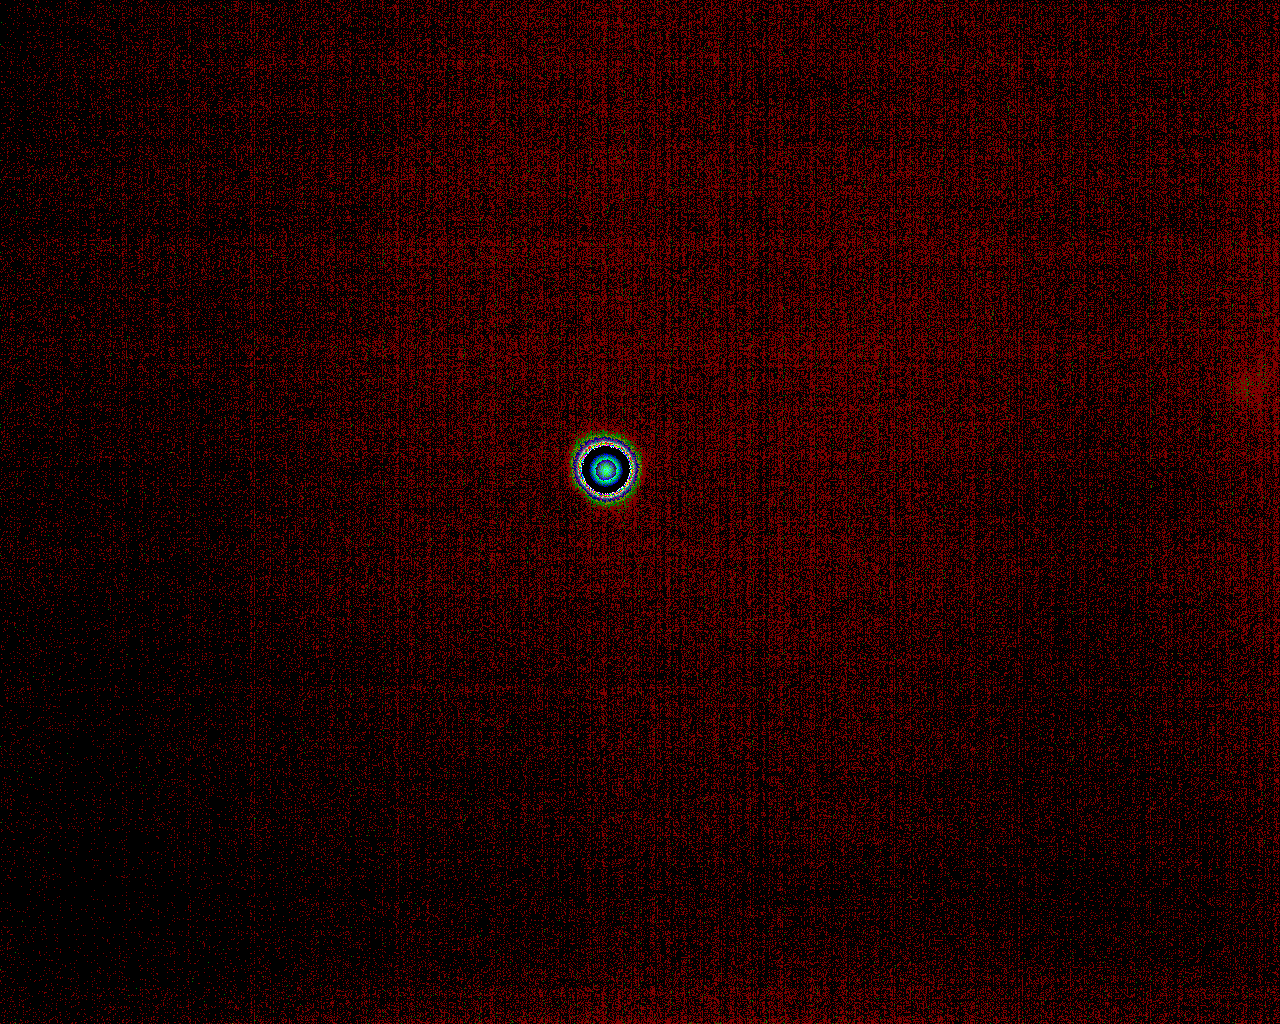

In [41]:
im_test

In [42]:
im_test = np.array(im_test)

In [44]:
print(im_test, im_test.shape, np.max(im_test))

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 1]
 [1 0 0 ... 0 0 0]] (1024, 1280) 111


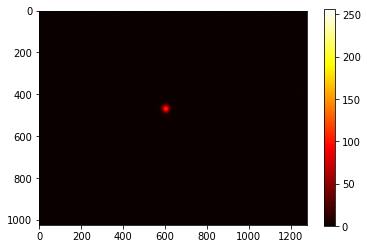

In [39]:
plt.imshow(im_test, cmap=plt.cm.hot, vmin=0, vmax=256)
plt.colorbar()
plt.show()

In [47]:
loc = []
for (i, j) in (range(len(im_test)), range(len(im_test[0]))):
    if im_test[i][j] > 16:
        loc.append([i, j])

ValueError: too many values to unpack (expected 2)

In [73]:
loc = np.array([[i, j] for i in range(len(im_test)) for j in range(len(im_test[0])) if im_test[i][j] >= 4])
xlist, ylist = loc[:, 0], loc[:, 1]
print(np.min(xlist), np.max(xlist), np.min(ylist), np.max(ylist))

436 502 572 639


In [74]:
loc = np.array([[i, j] for i in range(len(im_test)) for j in range(len(im_test[0])) if im_test[i][j] >= 8])
xlist, ylist = loc[:, 0], loc[:, 1]
print(np.min(xlist), np.max(xlist), np.min(ylist), np.max(ylist))

441 497 578 634


In [75]:
loc = np.array([[i, j] for i in range(len(im_test)) for j in range(len(im_test[0])) if im_test[i][j] >= 2])
xlist, ylist = loc[:, 0], loc[:, 1]
print(np.min(xlist), np.max(xlist), np.min(ylist), np.max(ylist))

0 1023 0 1279


In [94]:
def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFFFFF', '#98F5FF', '#00FF00', '#FFFF00','#FF0000', '#8B0000'], 256)

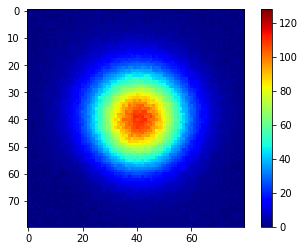

In [125]:
new = im_test[430:510, 565:645]
plt.imshow(new, cmap='jet', vmin=0, vmax=128)
plt.colorbar()
plt.show()

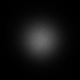

In [86]:
new_im = Image.fromarray(new.astype(np.uint8))
# new_im.show()
new_im

In [153]:
X = np.arange(430, 510)
Y = np.arange(565, 645)
X, Y = np.meshgrid(X, Y)
Z = new

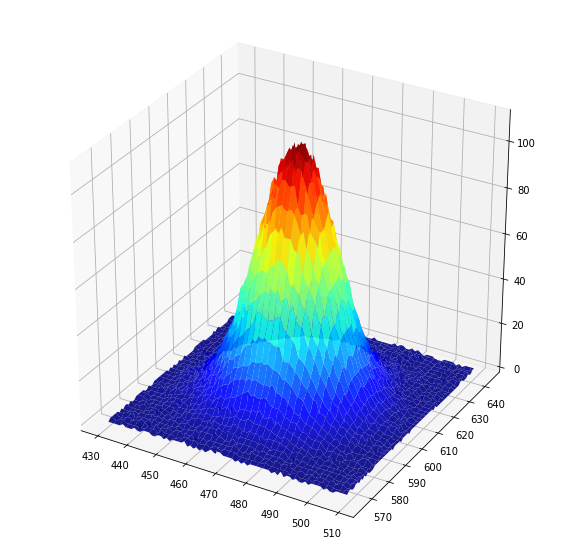

In [124]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.axes(projection = '3d')
ax1.plot_surface(X, Y, Z, alpha = 0.9, cmap='jet')

In [248]:
def Gauss_d_2(args, x0, y0, rho, sigma1, sigma2, amplitude):
    x, y = args
    alpha = -1/(2*(1-rho**2))
    z = amplitude * np.exp(alpha * (pow((x - x0)/sigma1, 2)-2*rho*(x - x0)*(y - y0)/(sigma1 * sigma2)+ pow((y-y0)/sigma2, 2)))
    return z

In [225]:
set = [1, 1, 3, 1, 1, 1, 1]
Gauss_d_2([1, 1], *set)

2.0

In [226]:
def test(args, a):
    x, y = args
    return x + a*y

In [227]:
args =[]
xx = X.ravel()
yy = X.ravel()
args = []
args.append(xx)
args.append(yy)
args = np.array(args)
args.shape

(2, 6400)

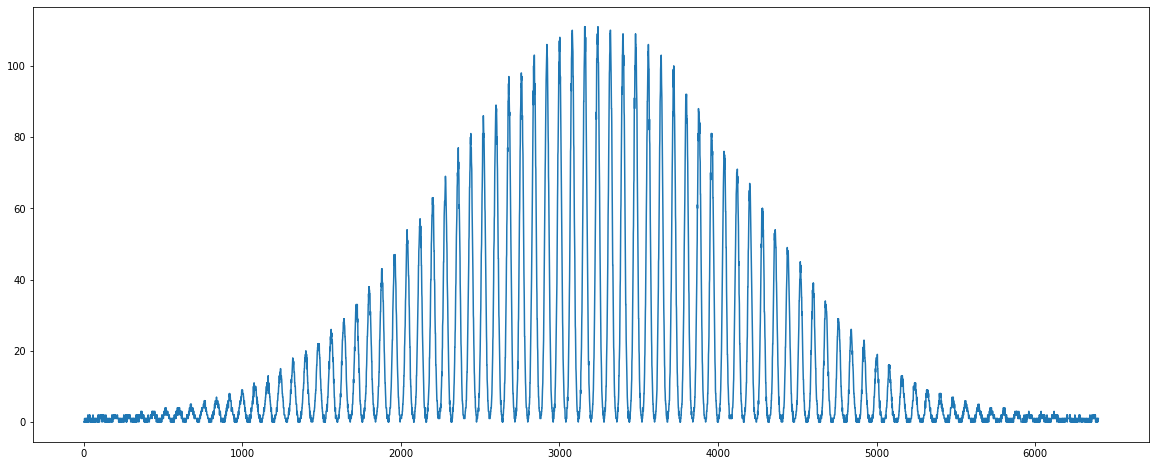

In [241]:
ydata = new.ravel()
np.max(ydata)
plt.figure(figsize = (20, 8))
plt.plot(range(len(ydata)), ydata)

In [250]:
ydata = new.ravel()
p0 = [460, 605, 0.4, 1, 1, 100]
paras, _ = opt.curve_fit(Gauss_d_2, args, ydata, bounds = ([430, 565, -1, -100, -100, 0],
                                                                                [510, 645, 1, 100, 100, 128]))
paras

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


ValueError: Residuals are not finite in the initial point.

In [243]:
fit_data = Gauss_d_2(args, *paras)
fit_data.shape
np.max(fit_data)

7.999999995401372

In [244]:
fit_new = fit_data.reshape(80, 80)

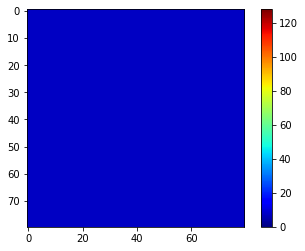

In [245]:
plt.imshow(fit_new, cmap='jet', vmin=0, vmax=128)
plt.colorbar()
plt.show()